In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()


Loading BokehJS ...

# Viz prep

In [2]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

In [3]:
sbt_palette4 = [
    # Pastel main colors
    "#B3D4E0",  # Pastel Light Blue
    "#146A4A",  # Deep Green
    "#E0C15A",  # Warm Yellow
    "#E65A70",  # Coral Pink
    "#4B2C69",  # Deep Purple

    # Pastel extended palette
    "#A8E1E3",  # Light Aqua
    "#2A7764",  # Medium Teal
    "#F0DAA5",  # Pale Yellow
    "#CC9E2F",  # Rich Mustard
    "#7EB6CE",  # Sky Blue
    "#104232",  # Forest Green
    "#F4989C",  # Soft Coral
    "#6B3F7D",  # Indigo Purple
    "#D7E4CC",  # Pale Sage
    "#D97158",  # Terracotta
    "#D2ECF2",  # Powder Blue
    "#2B4C6F",  # Navy Blue
    "#9BD3AE",  # Mint Green
    "#7A8B8D",  # Slate Gray
    "#E8C68B",   # Warm Sand
    
       # New additional colors
    "#FFB6C1",  # Light Pink
    "#FFD700",  # Gold
    "#8A2BE2",  # Blue Violet
    "#98FB98"   # Pale Green
]

Prøver lige noget


Pørver igen

# Generel prep

In [22]:
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByCompany.csv'
Comp = pd.read_csv(filepath, sep=';')
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByTargets.csv'
Targ = pd.read_csv(filepath, sep=';')

In [4]:
#Targ.info()
#Comp.info()
Targ = Targ.copy()
Comp = Comp.copy()

NameError: name 'Targ' is not defined

### Categorizing sectors in both Comp and Targ

In [24]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

### Editing Targ df

In [ ]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)] 
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
# Remove duplicates of stbi_id in Targ to make counting easier
Targ = Targ.drop_duplicates(subset=['sbti_id'])

### Editing Comp df

In [27]:
Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_16604\3877062900.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


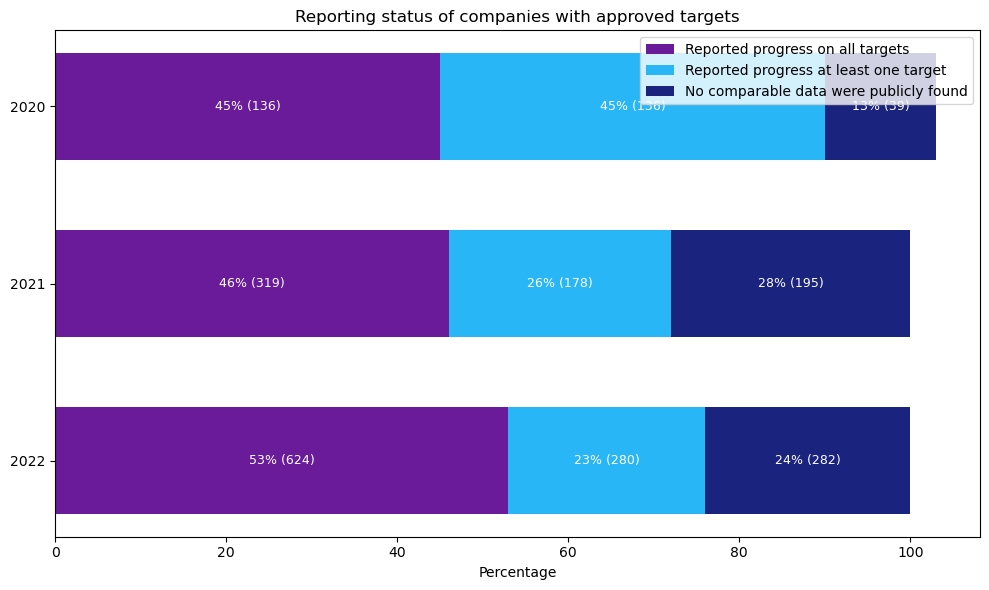

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['2022', '2021', '2020']
total_companies = [1186, 692, 305]
reported_all = [53, 46, 45]  # Percentages
reported_some = [23, 26, 45]  # Percentages
no_data = [24, 28, 13]  # Percentages

reported_all_values = [624, 319, 136]
reported_some_values = [280, 178, 136]
no_data_values = [282, 195, 39]

# Bar positions and widths
bar_width = 0.6
bar_positions = np.arange(len(years))

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(bar_positions, reported_all, color='#6A1B9A', height=bar_width, label='Reported progress on all targets')
ax.barh(bar_positions, reported_some, color='#29B6F6', height=bar_width, label='Reported progress at least one target', left=reported_all)
ax.barh(bar_positions, no_data, color='#1A237E', height=bar_width, label='No comparable data were publicly found', left=np.array(reported_all)+np.array(reported_some))

# Add text labels for percentages and values
for i, pos in enumerate(bar_positions):
    ax.text(reported_all[i]/2, pos, f"{reported_all[i]}% ({reported_all_values[i]})", va='center', ha='center', color='white', fontsize=9)
    ax.text(reported_all[i]+reported_some[i]/2, pos, f"{reported_some[i]}% ({reported_some_values[i]})", va='center', ha='center', color='white', fontsize=9)
    ax.text(reported_all[i]+reported_some[i]+no_data[i]/2, pos, f"{no_data[i]}% ({no_data_values[i]})", va='center', ha='center', color='white', fontsize=9)

# Labels and Title
ax.set_yticks(bar_positions)
ax.set_yticklabels(years)
ax.set_xlabel('Percentage')
ax.set_title('Reporting status of companies with approved targets')
ax.legend(loc='upper right')

# Adjust layout and show
plt.tight_layout()
plt.show()

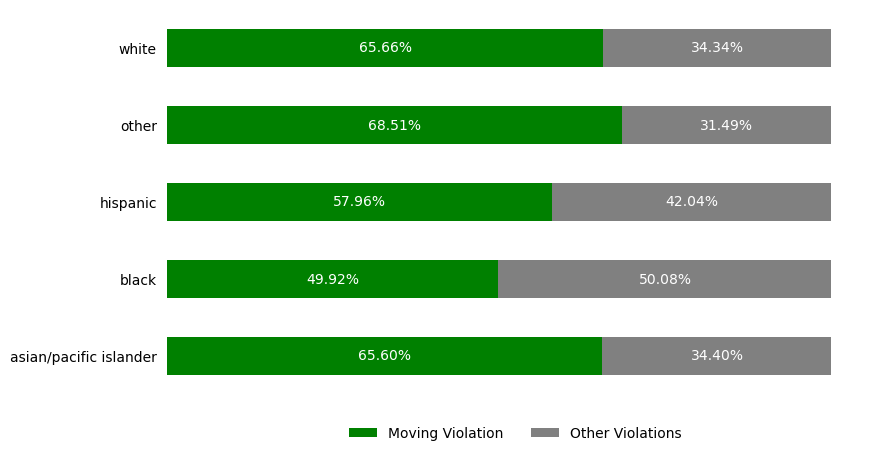

In [18]:
# dataframe
df = pd.DataFrame({'Moving Violation': [103281, 75376, 66957, 73071, 244090],
                   'Other Violations': [54165, 75619, 48567, 33587, 127639]},
                  index=['asian/pacific islander', 'black', 'hispanic', 'other', 'white'])

# get the totals for each row
totals = df.sum(axis=1)

# calculate the percent for each row
percent = df.div(totals, axis=0).mul(100).round(2)

# create the plot
ax = percent.plot(kind='barh', stacked=True, figsize=(9, 5), color=['green', 'gray'], xticks=[])
# move the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

# remove ticks
ax.tick_params(left=False, bottom=False)
# remove all spines
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

# iterate through each container
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')